# HW 5 Submission to Kaggle - Digit Recognizer 

Due Sunday by 11:59pm Points 10 Submitting a text entry box or a file upload 

1. go to [kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Build a model using the training data using any technique you like  
2.1. read train, test data into data frames and normalize  
2.2. build a model via a keras neural network and train it
3. Follow the directions to make a submission.  
3.1. use the model to predict results  
3.2. submit results to kaggle and get screen shot
4. Take a screenshot or snip of your result on the leaderboard
5. ensemble with other methods  
5.1 MLP, RandomForest, SVC classifier  
5.2 ensemble with voting  
6. Follow the directions to make a submission.  
6.1. use the model to predict results  
6.2. submit results to kaggle and get screen shot
7. Take a screenshot or snip of your result on the leaderboard

Disable autoscrolling of output per [SO:answer](https://stackoverflow.com/a/41646557).

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Fully show all cell output per [SO:answer](https://stackoverflow.com/a/36835741).

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os
import random
import warnings

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf # pip install tensorflow_gpu
from keras import backend as K # pip install keras
import keras.callbacks
from keras.utils import np_utils

import sys
tf.__version__
sys.version
!pwd

C:\Users\AFMS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'1.10.0'

'3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]'

/c/Users/AFMS/r/rn/rw/dm2/hw/05/out


## 1. go to kaggle

Downloaded train.csv and test.csv datasets to ../in folder from [kaggle.com/c/digit-recognizer/data](https://www.kaggle.com/c/digit-recognizer/data).

In [4]:
!ls ../in/*.csv

../in/sample_submission.csv
../in/test.csv
../in/train.csv


## 2. Build a model using the training data using any technique you like

### 2.1. read train, test data into data frames and normalize

Has any Nan: False
y:(42000,) int64; X:(42000, 784)


0    1
1    0
2    1
Name: label, dtype: int64

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

0 255


pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


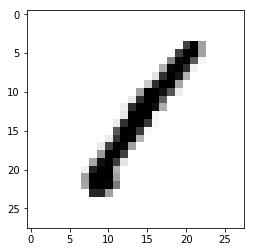

In [5]:
def load_yX(filename, sep=','):
    df = pd.read_csv(filename, sep=sep)
    y = df.iloc[:,0]
    X = df.iloc[:,1:]
    return y, X

def peekprint_yX(y, X, head_count=3):
    print("Has any Nan: {}".format(y.isnull().values.any() or X.isnull().values.any()))
    print("y:{} {}; X:{}".format(y.shape, y.dtypes, X.shape))
    display(y.head(head_count))
    display(y.describe())
    print(X.min().min(), X.max().max())
    display(X.dtypes)
    display(X.head(head_count))

def show_row(df, ndx):
    plt.imshow(df.iloc[ndx].values.reshape(28,28), cmap=plt.cm.binary)

y_train, x_train = load_yX('../in/train.csv')
peekprint_yX(y_train, x_train)
show_row(x_train, 0)

In [6]:
y1_train = np_utils.to_categorical(y_train).astype(int)
y1_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

Has any Nan: False


(28000, 784)

0 255


pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
pixel29     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


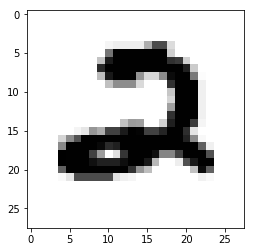

In [7]:
def load_X(filename, sep=','):
    df = pd.read_csv(filename, sep=sep)
    return df

def peekprint_X(X, head_count=3):
    print("Has any Nan: {}".format(X.isnull().values.any()))
    display(X.shape)
    print(X.min().min(), X.max().max())
    display(X.dtypes)
    display(X.head(head_count))

x_test = load_X('../in/test.csv')
peekprint_X(x_test)
show_row(x_test,0)

Normalize on train data and apply to test data.  Note training set min 0 and max 255 from above.

In [8]:
xn_train = x_train.applymap(lambda v: v/255.0)
xn_test = x_test.applymap(lambda v: v/255.0)
print(xn_train.min().min(), xn_train.max().max())
print(xn_test.min().min(), xn_test.max().max())

0.0 1.0
0.0 1.0


### 2.2. build a model via a keras neural network and train it

set keras random seed to deliver same results each time per [SO:a](https://stackoverflow.com/a/52897216).

In [9]:
def set_random_seed(v):
    os.environ['PYTHONHASSEED']=str(v)
    random.seed(v)
    np.random.seed(v)
    tf.set_random_seed(v)

set_random_seed(7)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

set keras to stop when loss is minimal or no longer improving  

[keras docs](https://keras.io/callbacks/#earlystopping)
```
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
```

[so:a](https://stackoverflow.com/a/37296168/1134881)

In [10]:
class EarlyStoppingByLossVal(keras.callbacks.Callback):
    def __init__(self, monitor='loss', value=0.00001, verbose=0):
        super(keras.callbacks.Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires {} available!".format(self.monitor))
        elif current < self.value:
            if self.verbose > 0:
                print("Epoch {}: early stopping fit".format(epoch))
            self.model.stop_training = True
            
callbacks = [
    EarlyStoppingByLossVal(monitor='loss', value=0.0001, verbose=1),
    #keras.callbacks.EarlyStopping(monitor='loss', patience=6, min_delta=0.000005, verbose=1),
    keras.callbacks.ModelCheckpoint(filepath='./weights/weights.hdf5', monitor='val_loss', save_best_only=True, verbose=0)]   

build the model

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
# model.fit(xn_train.values.reshape(42000,28,28), y_train.values, batch_size=420, epochs=30, callbacks=callbacks)
# model.save('kdigit.model')
# m = tf.keras.models.load_model('kdigit.model')

Above  model obtained and accuracy of 0.98257 on test data with basic NN above (non-CNN).

Add a CNN layer in the begining and see if we can get better results.

Must reshape the data from each image being in 784 flattened pixels to being (28,28) pixels.
Keras Conv2D layer also looks like it is expects the last dimension to not just be values, but an array.
Perhaps this is for something like [R,G,B] or [H,S,V] values.  In our case the last dimension is [G] for grayscale.

In [37]:
xn_train.values.shape
xn_train.values.reshape((-1,28,28,1)).shape

(42000, 784)

(42000, 28, 28, 1)

Now we can add the Conv2D layer with the correct input shape.  It will also need to be followed by a pooling layer.

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(xn_train.values.reshape(-1,28,28,1), y_train.values, batch_size=420, epochs=40, callbacks=callbacks)
model.save('kdigit.model')
m = tf.keras.models.load_model('kdigit.model')

Epoch 1/10
42000/42000 [==============================] - 7s 169us/step - loss: 0.3552 - acc: 0.8930
Epoch 2/10
 2100/42000 [>.............................] - ETA: 3s - loss: 0.0988 - acc: 0.9738

C:\Users\AFMS\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


42000/42000 [==============================] - 4s 98us/step - loss: 0.0807 - acc: 0.9765
Epoch 3/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0525 - acc: 0.9840
Epoch 4/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0372 - acc: 0.9885
Epoch 5/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0291 - acc: 0.9912
Epoch 6/10
42000/42000 [==============================] - 4s 97us/step - loss: 0.0222 - acc: 0.9927
Epoch 7/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0178 - acc: 0.9946
Epoch 8/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0139 - acc: 0.9952
Epoch 9/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0130 - acc: 0.9956
Epoch 10/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.0084 - acc: 0.9973


## 3. Follow the directions to make a submission.

### 3.1. use the model to predict results

In [87]:
y1_test = m.predict(xn_test.values.reshape(len(x_test),28,28))
print(y1_test.shape)

(28000, 10)


In [88]:
y_test = np.argmax(y1_test, axis=1)
print(y_test.shape)

(28000,)


### 3.2. submit results to kaggle and get screen shot

In [89]:
df = pd.DataFrame(data=y_test.astype(int), columns=['Label'], index=pd.RangeIndex(start=1, stop=28001, step=1))
df.index.name = "ImageId"
df.dtypes
df.head(2)
df.tail(2)

Label    int32
dtype: object

,Label
ImageId,
1,2
2,0


,Label
ImageId,
27999,9
28000,2


## 4. Take a screenshot or snip of your result on the leaderboard

![leaderboard](./ron_leaderboard2.PNG)

## 5. ensemble with other methods

### 5.1 MLP, RandomForest, SVC classifier

In [ ]:
nnm = MLPClassifier()
nnm.fit(x_train,y_train)
y_pred = nnm.predict(X_test)

def print_acc(y_actual, y_pred):
    print("       actual\n       +   -\npred+[[tp, fp]\ndict- [fn, tn]]")
    print(confusion_matrix(y_actual, y_pred), "\n")
    print("\n")
    print(classification_report(y_actual, y_pred))
    print(accuracy_score(y_actual, y_pred))

print_acc(y_test, y_pred)

### 5.2 ensemble with voting

## 6. Follow the directions to make a submission.

### 6.1. use the model to predict results

### 6.2. submit results to kaggle and get screen shot

## 7. Take a screenshot or snip of your result on the leaderboard